Ahora crearemos una clase principal que nos permitirá probar nuestras estrategias de manera mas practica y rapida.

In [1]:
pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=ba025bfc90618ddb41421399b61fec2ad40f25ed4cb51807b7327f4526edaa1f
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [3]:
pip install yfinance --upgrade --no-cache-dir

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import brute
from ta.trend import SMAIndicator

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')

# Creando la Clase TesterBase
Primero creamos la clase

In [6]:
class TesterBase():
  def __init__(self, simbolo, SMA_R, SMA_L, inicio, final):
    self.simbolo = simbolo
    self.SMA_R = SMA_R
    self.SMA_L = SMA_L
    self.inicio = inicio
    self.final = final
    self.resultados = None

Segundo, inicializamos la clase, o en otras palabras, creamos una instancia de nuestra clase (nuevo objeto) con los parámetros específicos según nuestras necesidades.

In [7]:
# Crear instancia a la clase
tester = TesterBase('AUDEUR=X', 9, 50, '2005', '2020-11-01')

Ahora podemos acceder a los parámetros de nuestro nuevo objeto **tester**.

In [8]:
tester.inicio

'2005'

## El metodo **obtener_data**

Agregaremos el método **obtener_data()** a nuestra clase

In [14]:
class TesterBase():
  def __init__(self, simbolo, SMA_R, SMA_L, inicio, final):
    self.simbolo = simbolo
    self.SMA_R = SMA_R
    self.SMA_L = SMA_L
    self.inicio = inicio
    self.final = final
    self.resultados = None

    # Podemos crear nuestros atributos aquí, a parte de la clase principal

    # Agregaremos el metodo 'obtener_data()', por lo que se ejecutara automaticamente al instanciar la clase
    # gracias al metodo '__init__'
    self.obtener_data()
  
  def obtener_data(self):
    raw = yf.download(self.simbolo, interval = '1d', start = self.inicio, end = self.final)['Adj Close']
    raw = raw.to_frame().dropna()
    raw['instrumento_retornos'] = raw['Adj Close'].pct_change()

    # Al principio nombramos la nueva columna segun el valor que se coloca en el parametro SMA
    raw['SMA_R: ' + str(self.SMA_R)] = SMAIndicator(raw['Adj Close'], self.SMA_R, True).sma_indicator()
    raw['SMA_L: ' + str(self.SMA_L)] = SMAIndicator(raw['Adj Close'], self.SMA_L, True).sma_indicator()

    # Aqui podemos crear atributos, ademas de los parametros de la clase principal
    self.data = raw
    return raw


In [17]:
tester = TesterBase('AUDEUR=X', 10, 60, '2005-01-01', '2020-11-01')

[*********************100%***********************]  1 of 1 completed


In [18]:
tester.data

,Adj Close,instrumento_retornos,SMA_R: 10,SMA_L: 60
Date,,,,
2005-01-03,0.57667,NaN,0.576670,0.576670
2005-01-04,0.57650,-0.000295,0.576585,0.576585
2005-01-05,0.57610,-0.000694,0.576423,0.576423
2005-01-06,0.57813,0.003524,0.576850,0.576850
2005-01-07,0.57971,0.002733,0.577422,0.577422
...,...,...,...,...
2020-10-26,0.60184,-0.002089,0.603817,0.609675
2020-10-27,0.60250,0.001097,0.603057,0.609631
2020-10-28,0.60454,0.003386,0.602501,0.609585


Estamos bien, pero qué pasa si queremos actualizar los valores de las SMA?

Veamos:

In [19]:
# Obtenemos los valores del SMA_L actual
tester.SMA_L

60

In [22]:
# Colocamos el nuevo valor para el SMA_L
tester.SMA_L = 200
tester.SMA_L

200

In [23]:
# Veamos si los nuevos valores fueron actualizados
tester.data.tail(3)

,Adj Close,instrumento_retornos,SMA_R: 10,SMA_L: 60
Date,,,,
2020-10-28,0.60454,0.003386,0.602501,0.609585
2020-10-29,0.60047,-0.006732,0.601760,0.609487
2020-10-30,0.60256,0.003481,0.601475,0.609381


Podemos ver que el nuevo valor de SMA_L **no fue** actualizado.

Resolvamos eso agregando el método **establecer_parametros** a nuestra clase, para que asi, podamos cambiar y actualizar los valores de las SMAs fácilmente.

## El método **establecer_parametros**

In [24]:
class TesterBase():
  def __init__(self, simbolo, SMA_R, SMA_L, inicio, final):
    self.simbolo = simbolo
    self.SMA_R = SMA_R
    self.SMA_L = SMA_L
    self.inicio = inicio
    self.final = final
    self.resultados = None

    self.obtener_data()
  
  def obtener_data(self):
    raw = yf.download(self.simbolo, interval = '1d', start = self.inicio, end = self.final)['Adj Close']
    raw = raw.to_frame().dropna()
    raw['instrumento_retornos'] = raw['Adj Close'].pct_change()

    raw['SMA_R: ' + str(self.SMA_R)] = SMAIndicator(raw['Adj Close'], self.SMA_R, True).sma_indicator()
    raw['SMA_L: ' + str(self.SMA_L)] = SMAIndicator(raw['Adj Close'], self.SMA_L, True).sma_indicator()

    self.data = raw
    return raw
  
  def establecer_parametros(self, SMA_R = None, SMA_L = None):
    if SMA_R is not None:

      # Elimina la columna SMA_R actual
      del self.data['SMA_R: ' + str(self.SMA_R)]

      # Asigna el nuevo valor establecido
      self.SMA_R = SMA_R

      # Aplica el SMAIndicator y crea la nueva columna con el nuevo valor del SMA
      self.data['SMA_R: ' + str(self.SMA_R)] = SMAIndicator(self.data['Adj Close'], self.SMA_R, True).sma_indicator()

    if SMA_L is not None:
      # Elimina la columna SMA_L actual
      del self.data['SMA_L: ' + str(self.SMA_L)]

      # Asigna el nuevo valor establecido
      self.SMA_L = SMA_L

      # Aplica el SMAIndicator y crea la nueva columna con el nuevo valor del SMA
      self.data['SMA_L: ' + str(self.SMA_L)] = SMAIndicator(self.data['Adj Close'], self.SMA_L, True).sma_indicator()

In [25]:
tester = TesterBase('AUDEUR=X', 10, 100, '2005-01-01', '2020-11-01')

[*********************100%***********************]  1 of 1 completed


In [26]:
tester.data.tail(3)

,Adj Close,instrumento_retornos,SMA_R: 10,SMA_L: 100
Date,,,,
2020-10-28,0.60454,0.003386,0.602501,0.610571
2020-10-29,0.60047,-0.006732,0.601760,0.610445
2020-10-30,0.60256,0.003481,0.601475,0.610420


In [28]:
# Establece nuevos parametros (valores) para las SMAs
tester.establecer_parametros(SMA_R = 50, SMA_L = 200)

In [29]:
tester.data.tail(3)

,Adj Close,instrumento_retornos,SMA_R: 50,SMA_L: 200
Date,,,,
2020-10-28,0.60454,0.003386,0.610012,0.600730
2020-10-29,0.60047,-0.006732,0.609887,0.600649
2020-10-30,0.60256,0.003481,0.609798,0.600569


Ahora está funcionando perfectamente! podemos cambiar y actualizar los valores de SMA fácilmente.

## El método **estrategia_CruceSMAs** 

In [40]:
class TesterBase():
  def __init__(self, simbolo, SMA_R, SMA_L, inicio, final):
    self.simbolo = simbolo
    self.SMA_R = SMA_R
    self.SMA_L = SMA_L
    self.inicio = inicio
    self.final = final
    self.resultados = None
    self.obtener_data()
  
  def obtener_data(self):
    raw = yf.download(self.simbolo, interval = '1d', start = self.inicio, end = self.final)['Adj Close']
    raw = raw.to_frame().dropna()
    raw['instrumento_retornos'] = raw['Adj Close'].pct_change()
    raw['SMA_R: ' + str(self.SMA_R)] = SMAIndicator(raw['Adj Close'], self.SMA_R, True).sma_indicator()
    raw['SMA_L: ' + str(self.SMA_L)] = SMAIndicator(raw['Adj Close'], self.SMA_L, True).sma_indicator()

    self.data = raw
    return raw
  
  def establecer_parametros(self, SMA_R = None, SMA_L = None):
    if SMA_R is not None:
      # Elimina la columna SMA_R actual
      del self.data['SMA_R: ' + str(self.SMA_R)]
      # Asigna el nuevo valor establecido
      self.SMA_R = SMA_R
      # Aplica el SMAIndicator y crea la nueva columna con el nuevo valor del SMA
      self.data['SMA_R: ' + str(self.SMA_R)] = SMAIndicator(self.data['Adj Close'], self.SMA_R, True).sma_indicator()

    if SMA_L is not None:
      # Elimina la columna SMA_L actual
      del self.data['SMA_L: ' + str(self.SMA_L)]
      # Asigna el nuevo valor establecido
      self.SMA_L = SMA_L
      # Aplica el SMAIndicator y crea la nueva columna con el nuevo valor del SMA
      self.data['SMA_L: ' + str(self.SMA_L)] = SMAIndicator(self.data['Adj Close'], self.SMA_L, True).sma_indicator()
  
  def estrategia_cruceSMA(self):
    data = self.data.copy().dropna()
    data['posicion'] = np.where(data['SMA_R: ' + str(self.SMA_R)] > data['SMA_L: ' + str(self.SMA_L)], 1, -1)
    data.dropna(inplace=True)

    self.resultados = data

   # Performance de la Estrategia
  def Medidores_de_Riesgo(self):
    df = self.resultados.copy().dropna()
    riskfree_rate = 0.022

    # Prepara los datos que son necesarios para el uso del metodo 'Medidores_de_Riesgo'
    df['instrumento_retornos']   = df['Adj Close'].pct_change()
    df['estrategia_retornos'] = df['posicion'].shift(1) * df['instrumento_retornos']
    # df.dropna(inplace=True)
    df['instrumento_retornos_acum'] = df['instrumento_retornos'].cumsum().apply(np.exp)
    df['estrategia_retornos_acum'] = df['estrategia_retornos'].cumsum().apply(np.exp)

    # Performance Absoluto ----------------------------------------------------/
    perf = df['estrategia_retornos_acum'][-1] 
    # % Superado --------------------------------------------------------------/
    pct_superado = perf - df['instrumento_retornos_acum'][-1] 
    # CAGR --------------------------------------------------------------------/
    numero_de_anios = len(df)/252 
    CAGR = (df['estrategia_retornos_acum'][-1])**(1/numero_de_anios) -1 
    # Volatilidad Anual -------------------------------------------------------/
    vol = df['instrumento_retornos'].std()* np.sqrt(252) 
    # Sharpe Ratio ------------------------------------------------------------/
    sharpe_ratio = (CAGR - riskfree_rate) / vol
    # Sortino Ratio -----------------------------------------------------------/
    neg_vol = df[df['instrumento_retornos'] < 0]['instrumento_retornos'].std()* np.sqrt(252) 
    sortino_ratio = (CAGR - riskfree_rate) / neg_vol
    # MDD ---------------------------------------------------------------------/
    df['max_ret_acum'] = df['estrategia_retornos_acum'].cummax()
    df['drawdown']     = df['max_ret_acum'] - df['estrategia_retornos_acum']
    df['drawdown_pct'] = df['drawdown'] / df['max_ret_acum']
    mdd                = df['drawdown_pct'].max()
    # Calmar Ratio ------------------------------------------------------------/
    calmar = CAGR / mdd
    # Imprime los valores con su respectivo texto -----------------------------/
    print("RENDIMIENTO DE LA ESTRATEGIA")
    print("-" * 100)
    print("% Superado al Benchmark:__" + str(round((pct_superado*100), 2)) + "%")
    print("CAGR (Rendimiento Anual)__" + str(round((CAGR*100), 2)) + "%")
    print("Volatilidad Anual:________" + str(round((vol*100), 2)) + "%")
    print("Maximum Drawdown:_________" + str(round((mdd*100), 2)) + "%")
    print("Sharpe R._________________" + str(round(sharpe_ratio, 2)))
    print("Sortino R.________________" + str(round(sortino_ratio, 2)))
    print("Calmar R._________________" + str(round(calmar, 2)))
    print("-" * 100)


In [41]:
# Creamos nuevamente la instancia de la clase (para incluir al nuevo metodo)
tester = TesterBase('EURUSD=X', 50, 200, '2004-01-01', '2020-06-30')

[*********************100%***********************]  1 of 1 completed


In [42]:
tester.estrategia_cruceSMA()

In [43]:
tester.Medidores_de_Riesgo()

RENDIMIENTO DE LA ESTRATEGIA
----------------------------------------------------------------------------------------------------
% Superado al Benchmark:__25.58%
CAGR (Rendimiento Anual)__1.41%
Volatilidad Anual:________12.1%
Maximum Drawdown:_________25.25%
Sharpe R._________________-0.07
Sortino R.________________-0.09
Calmar R._________________0.06
----------------------------------------------------------------------------------------------------


In [44]:
tester.data

,Adj Close,instrumento_retornos,SMA_R: 50,SMA_L: 200
Date,,,,
2004-01-01,1.258194,NaN,1.258194,1.258194
2004-01-02,1.258194,0.000000,1.258194,1.258194
2004-01-05,1.268698,0.008348,1.261695,1.261695
2004-01-06,1.272103,0.002684,1.264297,1.264297
2004-01-07,1.264095,-0.006295,1.264257,1.264257
...,...,...,...,...
2020-06-24,1.131235,0.002896,1.101794,1.103430
2020-06-25,1.125087,-0.005434,1.102486,1.103540
2020-06-26,1.122208,-0.002559,1.103213,1.103627


In [45]:
tester.resultados

,Adj Close,instrumento_retornos,SMA_R: 50,SMA_L: 200,posicion
Date,,,,,
2004-01-02,1.258194,0.000000,1.258194,1.258194,-1
2004-01-05,1.268698,0.008348,1.261695,1.261695,-1
2004-01-06,1.272103,0.002684,1.264297,1.264297,-1
2004-01-07,1.264095,-0.006295,1.264257,1.264257,-1
2004-01-08,1.277498,0.010603,1.266464,1.266464,-1
...,...,...,...,...,...
2020-06-24,1.131235,0.002896,1.101794,1.103430,-1
2020-06-25,1.125087,-0.005434,1.102486,1.103540,-1
2020-06-26,1.122208,-0.002559,1.103213,1.103627,-1


## El método **plot_resultados**

In [56]:
class TesterBase():
  def __init__(self, simbolo, SMA_R, SMA_L, inicio, final):
    self.simbolo = simbolo
    self.SMA_R = SMA_R
    self.SMA_L = SMA_L
    self.inicio = inicio
    self.final = final
    self.resultados = None
    self.obtener_data()
  
  def obtener_data(self):
    raw = yf.download(self.simbolo, interval = '1d', start = self.inicio, end = self.final)['Adj Close']
    raw = raw.to_frame().dropna()
    raw['instrumento_retornos'] = raw['Adj Close'].pct_change()
    raw['SMA_R: ' + str(self.SMA_R)] = SMAIndicator(raw['Adj Close'], self.SMA_R, True).sma_indicator()
    raw['SMA_L: ' + str(self.SMA_L)] = SMAIndicator(raw['Adj Close'], self.SMA_L, True).sma_indicator()

    self.data = raw
    return raw
  
  def establecer_parametros(self, SMA_R = None, SMA_L = None):
    if SMA_R is not None:
      # Elimina la columna SMA_R actual
      del self.data['SMA_R: ' + str(self.SMA_R)]
      # Asigna el nuevo valor establecido
      self.SMA_R = SMA_R
      # Aplica el SMAIndicator y crea la nueva columna con el nuevo valor del SMA
      self.data['SMA_R: ' + str(self.SMA_R)] = SMAIndicator(self.data['Adj Close'], self.SMA_R, True).sma_indicator()

    if SMA_L is not None:
      # Elimina la columna SMA_L actual
      del self.data['SMA_L: ' + str(self.SMA_L)]
      # Asigna el nuevo valor establecido
      self.SMA_L = SMA_L
      # Aplica el SMAIndicator y crea la nueva columna con el nuevo valor del SMA
      self.data['SMA_L: ' + str(self.SMA_L)] = SMAIndicator(self.data['Adj Close'], self.SMA_L, True).sma_indicator()
  
  def estrategia_cruceSMA(self):
    data = self.data.copy().dropna()
    data['posicion'] = np.where(data['SMA_R: ' + str(self.SMA_R)] > data['SMA_L: ' + str(self.SMA_L)], 1, -1)
    data.dropna(inplace=True)

    self.resultados = data

   # Performance de la Estrategia
  def Medidores_de_Riesgo(self):
    df = self.resultados.copy().dropna()
    riskfree_rate = 0.022

    # Prepara los datos que son necesarios para el uso del metodo 'Medidores_de_Riesgo'
    df['instrumento_retornos']   = df['Adj Close'].pct_change()
    df['estrategia_retornos'] = df['posicion'].shift(1) * df['instrumento_retornos']
    # df.dropna(inplace=True)
    df['instrumento_retornos_acum'] = df['instrumento_retornos'].cumsum().apply(np.exp)
    df['estrategia_retornos_acum'] = df['estrategia_retornos'].cumsum().apply(np.exp)

    self.resultados = df

    # Performance Absoluto ----------------------------------------------------/
    perf = df['estrategia_retornos_acum'][-1] 
    # % Superado --------------------------------------------------------------/
    pct_superado = perf - df['instrumento_retornos_acum'][-1] 
    # CAGR --------------------------------------------------------------------/
    numero_de_anios = len(df)/252 
    CAGR = (df['estrategia_retornos_acum'][-1])**(1/numero_de_anios) -1 
    # Volatilidad Anual -------------------------------------------------------/
    vol = df['instrumento_retornos'].std()* np.sqrt(252) 
    # Sharpe Ratio ------------------------------------------------------------/
    sharpe_ratio = (CAGR - riskfree_rate) / vol
    # Sortino Ratio -----------------------------------------------------------/
    neg_vol = df[df['instrumento_retornos'] < 0]['instrumento_retornos'].std()* np.sqrt(252) 
    sortino_ratio = (CAGR - riskfree_rate) / neg_vol
    # MDD ---------------------------------------------------------------------/
    df['max_ret_acum'] = df['estrategia_retornos_acum'].cummax()
    df['drawdown']     = df['max_ret_acum'] - df['estrategia_retornos_acum']
    df['drawdown_pct'] = df['drawdown'] / df['max_ret_acum']
    mdd                = df['drawdown_pct'].max()
    # Calmar Ratio ------------------------------------------------------------/
    calmar = CAGR / mdd
    # Imprime los valores con su respectivo texto -----------------------------/
    print("RENDIMIENTO DE LA ESTRATEGIA")
    print("-" * 100)
    print("% Superado al Benchmark:__" + str(round((pct_superado*100), 2)) + "%")
    print("CAGR (Rendimiento Anual)__" + str(round((CAGR*100), 2)) + "%")
    print("Volatilidad Anual:________" + str(round((vol*100), 2)) + "%")
    print("Maximum Drawdown:_________" + str(round((mdd*100), 2)) + "%")
    print("Sharpe R._________________" + str(round(sharpe_ratio, 2)))
    print("Sortino R.________________" + str(round(sortino_ratio, 2)))
    print("Calmar R._________________" + str(round(calmar, 2)))
    print("-" * 100)

  def plot_resultados(self):
    if self.resultados is None:
      print('Aun no hay nada que mostrar ... sigue los siguientes pasos:')
      print('1.- Cargue la clase TesterBase, x=TesterBase(simbolo, sma_rapida, sma_lenta, inicio, final')
      print('2.- Ejecute la estrategia y pruebe los resultados. x.estrategia_cruceSMA')
      print('3.- Ver los Resultados. x.Medidores_de_Riesgo()')
      print('4.- Plotear los Resultados. x.plot_resultados()')
    else:
      titulo = '{} | SMA_R: {} | SMA_L {}'.format(self.simbolo, self.SMA_R, self.SMA_L)
      self.resultados[['instrumento_retornos_acum','estrategia_retornos_acum']].plot(title=titulo, figsize=(12, 6))

In [57]:
# Creamos nuevamente la instancia de la clase (para incluir el nuevo metodo)
tester = TesterBase('EURUSD=X', 50, 200, '2004-01-01', '2020-06-30')

[*********************100%***********************]  1 of 1 completed


In [58]:
tester.plot_resultados()

Aun no hay nada que mostrar ... sigue los siguientes pasos:
1.- Cargue la clase TesterBase, x=TesterBase(simbolo, sma_rapida, sma_lenta, inicio, final
2.- Ejecute la estrategia y pruebe los resultados. x.estrategia_cruceSMA
3.- Ver los Resultados. x.Medidores_de_Riesgo()
4.- Plotear los Resultados. x.plot_resultados()


In [59]:
tester.estrategia_cruceSMA()

In [60]:
tester.Medidores_de_Riesgo()

RENDIMIENTO DE LA ESTRATEGIA
----------------------------------------------------------------------------------------------------
% Superado al Benchmark:__25.58%
CAGR (Rendimiento Anual)__1.41%
Volatilidad Anual:________12.1%
Maximum Drawdown:_________25.25%
Sharpe R._________________-0.07
Sortino R.________________-0.09
Calmar R._________________0.06
----------------------------------------------------------------------------------------------------


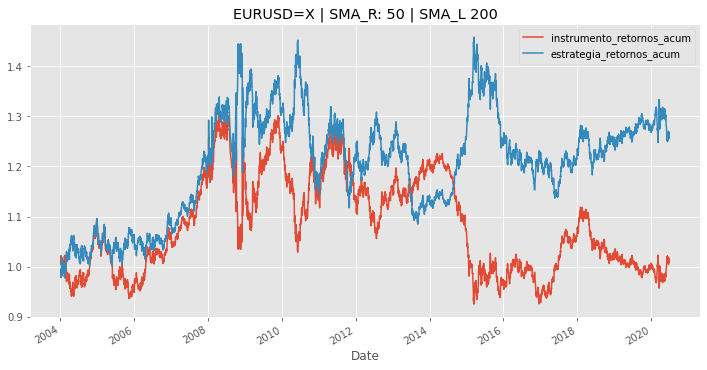

In [61]:
tester.plot_resultados()